In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '43fc0af1-1d8d-4391-8166-ccecede32f40',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-14T04:57:18.116Z', 'error_code': 0, 'error_message': None, 'elapsed': 41, 'credit_count': 1, 'notice': None, 'total_count': 10029}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11631, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973964e+07,1.973964e+07,False,NaN,1,NaN,NaN,None,2024-08-14T04:56:00.000Z,61011.959170,2.917543e+10,-21.1709,-0.077417,2.992018,6.653276,-2.525813,-7.878670,-7.350100,1.204354e+12,56.2641,1.281251e+12,None,2024-08-14T04:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 07:57:19.915857
1,1027,Ethereum,ETH,ethereum,9206,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202748e+08,1.202748e+08,True,NaN,2,NaN,NaN,None,2024-08-14T04:55:00.000Z,2724.277765,1.498136e+10,-31.8823,0.301242,2.465816,8.090791,-18.305988,-22.414586,-9.428591,3.276619e+11,15.3074,3.276619e+11,None,2024-08-14T04:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 07:57:19.915857
2,825,Tether USDt,USDT,tether,94070,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.156386e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-14T04:55:00.000Z,1.000339,4.929216e+10,-22.4175,-0.004651,0.005345,-0.033260,-0.018433,0.093289,0.014137,1.156777e+11,5.4032,1.171077e+11,None,2024-08-14T04:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-14 07:57:19.915857
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459364e+08,1.459364e+08,False,NaN,4,NaN,NaN,None,2024-08-14T04:55:00.000Z,527.941050,1.724440e+09,-3.9036,0.319256,1.887781,6.352812,-4.511143,-12.940426,-9.504703,7.704582e+10,3.5987,7.704582e+10,None,2024-08-14T04:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 07:57:19.915857
4,5426,Solana,SOL,solana,715,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.668415e+08,5.822636e+08,True,NaN,5,NaN,NaN,None,2024-08-14T04:55:00.000Z,144.893035,2.151164e+09,-36.0333,-0.615172,0.070161,-5.926986,-4.676530,-0.019036,-11.173253,6.764209e+10,3.1595,8.436594e+10,None,2024-08-14T04:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 07:57:19.915857
5,3408,USDC,USDC,usd-coin,21485,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.450844e+10,3.450844e+10,False,NaN,6,NaN,NaN,None,2024-08-14T04:55:00.000Z,0.999996,5.439779e+09,-29.5485,-0.002088,0.001291,-0.024948,-0.002634,0.003900,0.009745,3.450830e+10,1.6121,3.450830e+10,None,2024-08-14T04:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-14 07:57:19.915857
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.611308e+10,9.998734e+10,False,NaN,7,NaN,NaN,None,2024-08-14T04:56:00.000Z,0.579808,1.277309e+09,-9.5558,0.152664,2.493826,12.385835,9.522770,21.462099,11.728544,3.253483e+10,1.5196,5.798084e+10,None,2024-08-14T04:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 07:57:19.915857
7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518573e+09,5.110454e+09,True,NaN,8,3.414167e+09,2.276563e+10,None,2024-08-14T04:55:00.000Z,6.667989,3.370897e+08,-30.2141,1.769617,6.353597,15.127361,-11.192436,-16.627492,-2.437570,1.679382e+10,0.7844,3.407645e+10,None,2024-08-14T04:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 07:57:19.915857
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '43fc0af1-1d8d-4391-8166-ccecede32f40',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2, df_append])
    #df
    #create a csv and append data to it
  
    if not os.path.isfile(r'D:\projects\API.csv'):
        df.to_csv(r'D:\projects\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\projects\API.csv', mode='a', header=False)

In [5]:
import os
from time import time
from time import sleep

for i in range(50):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()



API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973964e+07,1.973964e+07,False,NaN,1,NaN,NaN,None,2024-08-14T04:59:00.000Z,60937.587915,2.916832e+10,-21.2235,-0.116294,2.865951,6.700678,-2.729231,-7.973281,-7.449848,1.202886e+12,56.2079,1.279689e+12,None,2024-08-14T04:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
1,1027,Ethereum,ETH,ethereum,9206,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202748e+08,1.202748e+08,True,NaN,2,NaN,NaN,None,2024-08-14T04:58:00.000Z,2721.714196,1.499465e+10,-31.8698,0.289677,2.241957,7.950659,-18.404446,-22.410581,-9.537345,3.273536e+11,15.2930,3.273536e+11,None,2024-08-14T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
2,825,Tether USDt,USDT,tether,94070,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.156386e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-14T04:58:00.000Z,1.000348,4.931083e+10,-22.4243,-0.012811,0.009575,-0.027437,-0.018474,0.079048,0.010162,1.156788e+11,5.4029,1.171088e+11,None,2024-08-14T04:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-14 08:00:31.942633
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459364e+08,1.459364e+08,False,NaN,4,NaN,NaN,None,2024-08-14T04:58:00.000Z,527.771851,1.726385e+09,-3.8121,0.318426,1.771536,6.336887,-4.622390,-12.935895,-9.491351,7.702112e+10,3.5973,7.702112e+10,None,2024-08-14T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
4,5426,Solana,SOL,solana,715,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.668415e+08,5.822636e+08,True,NaN,5,NaN,NaN,None,2024-08-14T04:58:00.000Z,144.756827,2.152018e+09,-36.0062,-0.567615,-0.162353,-5.829148,-4.789850,-0.015921,-11.246892,6.757850e+10,3.1563,8.428663e+10,None,2024-08-14T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
5,3408,USDC,USDC,usd-coin,21485,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.450844e+10,3.450844e+10,False,NaN,6,NaN,NaN,None,2024-08-14T04:58:00.000Z,0.999915,5.439284e+09,-29.5720,-0.023755,0.000795,-0.016077,-0.006517,-0.027780,-0.002335,3.450549e+10,1.6118,3.450549e+10,None,2024-08-14T04:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-14 08:00:31.942633
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.611308e+10,9.998734e+10,False,NaN,7,NaN,NaN,None,2024-08-14T04:59:00.000Z,0.577897,1.286192e+09,-8.9653,-0.280342,2.060360,12.067520,9.049055,21.075335,11.329606,3.242757e+10,1.5146,5.778968e+10,None,2024-08-14T04:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518573e+09,5.110454e+09,True,NaN,8,3.414167e+09,2.272644e+10,None,2024-08-14T04:58:00.000Z,6.656511,3.375931e+08,-30.1643,1.195896,6.136822,14.995640,-11.297072,-16.637144,-2.640828,1.676491e+10,0.7830,3.401779e+10,None,2024-08-14T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-excha

In [31]:
df3 = pd.read_csv(r'D:\projects\API.csv')
df3 = df3.drop_duplicates()
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000,19739590.000,19739590.000,False,NaN,1,NaN,NaN,NaN,2024-08-14T01:12:00.000Z,60684.802,29822202985.010,-18.527,0.083,1.830,8.456,-1.355,-8.332,-8.165,1197893104819.771,56.131,1274380835732.410,NaN,2024-08-14T01:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 04:13:10.845117
1,1,1027,Ethereum,ETH,ethereum,9206,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120274778.264,120274778.264,True,NaN,2,NaN,NaN,NaN,2024-08-14T01:11:00.000Z,2706.216,15982746896.177,-25.055,0.090,-0.296,10.869,-17.587,-22.606,-10.433,325489582028.908,15.261,325489582028.910,NaN,2024-08-14T01:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 04:13:10.845117
2,2,825,Tether USDt,USDT,tether,94065,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,115638558844.547,117068077122.292,True,NaN,3,NaN,NaN,NaN,2024-08-14T01:11:00.000Z,1.001,50591501981.811,-19.130,0.032,0.044,-0.010,0.022,0.109,0.034,115715639318.421,5.422,117146110461.260,NaN,2024-08-14T01:11:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-14 04:13:10.845117
3,3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145936405.166,145936405.166,False,NaN,4,NaN,NaN,NaN,2024-08-14T01:11:00.000Z,524.964,1751238027.298,-1.689,0.204,0.893,8.780,-4.231,-13.220,-10.345,76611374623.898,3.590,76611374623.900,NaN,2024-08-14T01:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 04:13:10.845117
4,4,5426,Solana,SOL,solana,715,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,466842812.421,582264167.115,True,NaN,5,NaN,NaN,NaN,2024-08-14T01:11:00.000Z,145.486,2152909912.634,-34.787,-0.677,-0.378,0.856,-3.247,0.829,-9.875,67919194085.188,3.183,84711410185.450,NaN,2024-08-14T01:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 04:13:10.845117
5,5,3408,USDC,USDC,usd-coin,21485,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34490810221.877,34490810221.877,False,NaN,6,NaN,NaN,NaN,2024-08-14T01:11:00.000Z,1.000,5600016663.437,-26.733,0.053,0.048,0.011,0.056,0.039,0.041,34507255418.832,1.618,34507255418.830,NaN,2024-08-14T01:11:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-14 04:13:10.845117
6,6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000,56113081096.000,99987342059.000,False,NaN,7,NaN,NaN,NaN,2024-08-14T01:12:00.000Z,0.574,1239698267.422,-14.333,-0.515,0.775,13.815,9.709,20.670,10.781,32223488235.510,1.510,57425982687.320,NaN,2024-08-14T01:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 04:13:10.845117
7,7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2518565735.346,5110446385.768,True,NaN,8,3414166606.000,22001818850.362,NaN,2024-08-14T01:11:00.000Z,6.444,314059919.102,-37.034,-0.278,2.654,12.424,-13.716,-21.241,-8.418,16230323082.191,0.761,32933107431.420,NaN,2024-08-14T01:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 04:13:10.845117
8,8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,145523486383.705,145523486383.705,True,NaN,

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000,19739640.000,19739640.000,False,NaN,1,NaN,NaN,None,2024-08-14T04:59:00.000Z,60937.588,29168323352.081,-21.224,-0.116,2.866,6.701,-2.729,-7.973,-7.450,1202886047918.847,56.208,1279689346223.930,None,2024-08-14T04:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
1,1027,Ethereum,ETH,ethereum,9206,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120274778.264,120274778.264,True,NaN,2,NaN,NaN,None,2024-08-14T04:58:00.000Z,2721.714,14994647849.279,-31.870,0.290,2.242,7.951,-18.404,-22.411,-9.537,327353571414.962,15.293,327353571414.960,None,2024-08-14T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
2,825,Tether USDt,USDT,tether,94070,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.547,117068077122.292,True,NaN,3,NaN,NaN,None,2024-08-14T04:58:00.000Z,1.000,49310834811.372,-22.424,-0.013,0.010,-0.027,-0.018,0.079,0.010,115678765567.773,5.403,117108780879.090,None,2024-08-14T04:58:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-14 08:00:31.942633
3,1839,BNB,BNB,bnb,2207,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936397.544,145936397.544,False,NaN,4,NaN,NaN,None,2024-08-14T04:58:00.000Z,527.772,1726385496.240,-3.812,0.318,1.772,6.337,-4.622,-12.936,-9.491,77021122628.386,3.597,77021122628.390,None,2024-08-14T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
4,5426,Solana,SOL,solana,715,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466841549.583,582263612.813,True,NaN,5,NaN,NaN,None,2024-08-14T04:58:00.000Z,144.757,2152017859.483,-36.006,-0.568,-0.162,-5.829,-4.790,-0.016,-11.247,67578501593.461,3.156,84286633272.900,None,2024-08-14T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
5,3408,USDC,USDC,usd-coin,21485,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34508441413.378,34508441413.378,False,NaN,6,NaN,NaN,None,2024-08-14T04:58:00.000Z,1.000,5439284183.260,-29.572,-0.024,0.001,-0.016,-0.007,-0.028,-0.002,34505492443.080,1.612,34505492443.080,None,2024-08-14T04:58:00.000Z,1027.000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-14 08:00:31.942633
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000,56113081096.000,99987342059.000,False,NaN,7,NaN,NaN,None,2024-08-14T04:59:00.000Z,0.578,1286191620.571,-8.965,-0.280,2.060,12.068,9.049,21.075,11.330,32427568784.683,1.515,57789677827.890,None,2024-08-14T04:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
7,11419,Toncoin,TON,toncoin,502,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518572762.404,5110453534.791,True,NaN,8,3414166606.000,22726438093.371,None,2024-08-14T04:58:00.000Z,6.657,337593076.230,-30.164,1.196,6.137,14.996,-11.297,-16.637,-2.641,16764907684.304,0.783,34017790954.720,None,2024-08-14T04:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-14 08:00:31.942633
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145525506383.705,145525506383.705,True,NaN,9,NaN,Na

In [12]:
 #Now let's look at the coin trends over time

df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.116,2.866,6.701,-2.729,-7.973,-7.450
Ethereum,0.290,2.242,7.951,-18.404,-22.411,-9.537
Tether USDt,-0.013,0.010,-0.027,-0.018,0.079,0.010
BNB,0.318,1.772,6.337,-4.622,-12.936,-9.491
Solana,-0.568,-0.162,-5.829,-4.790,-0.016,-11.247
USDC,-0.024,0.001,-0.016,-0.007,-0.028,-0.002
XRP,-0.280,2.060,12.068,9.049,21.075,11.330
Toncoin,1.196,6.137,14.996,-11.297,-16.637,-2.641
Dogecoin,-0.154,1.211,6.685,-9.857,-22.053,-32.408


In [13]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.116
              quote.USD.percent_change_24h     2.866
              quote.USD.percent_change_7d      6.701
              quote.USD.percent_change_30d    -2.729
              quote.USD.percent_change_60d    -7.973
              quote.USD.percent_change_90d    -7.450
Ethereum      quote.USD.percent_change_1h      0.290
              quote.USD.percent_change_24h     2.242
              quote.USD.percent_change_7d      7.951
              quote.USD.percent_change_30d   -18.404
              quote.USD.percent_change_60d   -22.411
              quote.USD.percent_change_90d    -9.537
Tether USDt   quote.USD.percent_change_1h     -0.013
              quote.USD.percent_change_24h     0.010
              quote.USD.percent_change_7d     -0.027
              quote.USD.percent_change_30d    -0.018
              quote.USD.percent_change_60d     0.079
              quote.USD.percent_change_90d     0.010
BNB

In [14]:
type(df5)

pandas.core.series.Series

In [15]:
df6 = df5.to_frame(name='values')
df6

values
name                                             
Bitcoin      quote.USD.percent_change_1h   -0.116
             quote.USD.percent_change_24h   2.866
             quote.USD.percent_change_7d    6.701
             quote.USD.percent_change_30d  -2.729
             quote.USD.percent_change_60d  -7.973
             quote.USD.percent_change_90d  -7.450
Ethereum     quote.USD.percent_change_1h    0.290
             quote.USD.percent_change_24h   2.242
             quote.USD.percent_change_7d    7.951
             quote.USD.percent_change_30d -18.404
             quote.USD.percent_change_60d -22.411
             quote.USD.percent_change_90d  -9.537
Tether USDt  quote.USD.percent_change_1h   -0.013
             quote.USD.percent_change_24h   0.010
             quote.USD.percent_change_7d   -0.027
             quote.USD.percent_change_30d  -0.018
             quote.USD.percent_change_60d   0.079
             quote.USD.percent_change_90d   0.010
BNB          quote.USD.percent_change_1h    0.318
             quote.USD.percent_change_24h   1.772
             quote.USD.percent_change_7d    6.337
             quote.USD.percent_change_30d  -4.622
             quote.USD.percent_change_60d -12.936
             quote.USD.percent_change_90d  -9.491
Solana       quote.USD.percent_change_1h   -0.568
             quote.USD.percent_change_24h  -0.162
             quote.USD.percent_change_7d   -5.829
             quote.USD.percent_change_30d  -4.790
             quote.USD.percent_change_60d  -0.016
             quote.USD.percent_change_90d -11.247
USDC         quote.USD.percent_change_1h   -0.024
             quote.USD.percent_change_24h   0.001
             quote.USD.percent_change_7d   -0.016
             quote.USD.percent_change_30d  -0.007
             quote.USD.percent_change_60d  -0.028
             quote.USD.percent_change_90d  -0.002
XRP          quote.USD.percent_change_1h   -0.280
             quote.USD.percent_change_24h   2.060
             quote.USD.percent_change_7d   12.068
             quote.USD.percent_change_30d   9.049
             quote.USD.percent_change_60d  21.075
             quote.USD.percent_change_90d  11.330
Toncoin      quote.USD.percent_change_1h    1.196
             quote.USD.percent_change_24h   6.137
             quote.USD.percent_change_7d   14.996
             quote.USD.percent_change_30d -11.297
             quote.USD.percent_change_60d -16.637
             quote.USD.percent_change_90d  -2.641
Dogecoin     quote.USD.percent_change_1h   -0.154
             quote.USD.percent_change_24h   1.211
             quote.USD.percent_change_7d    6.685
             quote.USD.percent_change_30d  -9.857
             quote.USD.percent_change_60d -22.053
             quote.USD.percent_change_90d -32.408
Cardano      quote.USD.percent_change_1h    0.137
             quote.USD.percent_change_24h   1.113
             quote.USD.percent_change_7d    1.082
             quote.USD.percent_change_30d -21.628
             quote.USD.percent_change_60d -17.346
             quote.USD.percent_change_90d -26.233
TRON         quote.USD.percent_change_1h    0.080
             quote.USD.percent_change_24h   2.784
             quote.USD.percent_change_7d    4.388
             quote.USD.percent_change_30d  -6.416
             quote.USD.percent_change_60d  11.853
             quote.USD.percent_change_90d   3.641
Avalanche    quote.USD.percent_change_1h   -0.251
             quote.USD.percent_change_24h   1.805
             quote.USD.percent_change_7d   -0.786
             quote.USD.percent_change_30d -20.446
             quote.USD.percent_change_60d -29.616
             quote.USD.percent_change_90d -38.689
Shiba Inu    quote.USD.percent_change_1h   -0.287
             quote.USD.percent_change_24h   0.583
             quote.USD.percent_change_7d    0.585
             quote.USD.percent_change_30d -22.962
             quote.USD.percent_change_60d -33.350
             quote.USD.percent_change_90d -44.826
Bitcoin Cash quote.USD.percent_change_1h   

In [16]:
df6.count()

values    90
dtype: int64

In [17]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.116
1,Bitcoin,quote.USD.percent_change_24h,2.866
2,Bitcoin,quote.USD.percent_change_7d,6.701
3,Bitcoin,quote.USD.percent_change_30d,-2.729
4,Bitcoin,quote.USD.percent_change_60d,-7.973
5,Bitcoin,quote.USD.percent_change_90d,-7.450
6,Ethereum,quote.USD.percent_change_1h,0.290
7,Ethereum,quote.USD.percent_change_24h,2.242
8,Ethereum,quote.USD.percent_change_7d,7.951
9,Ethereum,quote.USD.percent_change_30d,-18.404


In [18]:
# Change the column name

df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.116
1,Bitcoin,quote.USD.percent_change_24h,2.866
2,Bitcoin,quote.USD.percent_change_7d,6.701
3,Bitcoin,quote.USD.percent_change_30d,-2.729
4,Bitcoin,quote.USD.percent_change_60d,-7.973
5,Bitcoin,quote.USD.percent_change_90d,-7.450
6,Ethereum,quote.USD.percent_change_1h,0.290
7,Ethereum,quote.USD.percent_change_24h,2.242
8,Ethereum,quote.USD.percent_change_7d,7.951
9,Ethereum,quote.USD.percent_change_30d,-18.404


In [19]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.116
1,Bitcoin,24h,2.866
2,Bitcoin,7d,6.701
3,Bitcoin,30d,-2.729
4,Bitcoin,60d,-7.973
5,Bitcoin,90d,-7.450
6,Ethereum,1h,0.290
7,Ethereum,24h,2.242
8,Ethereum,7d,7.951
9,Ethereum,30d,-18.404


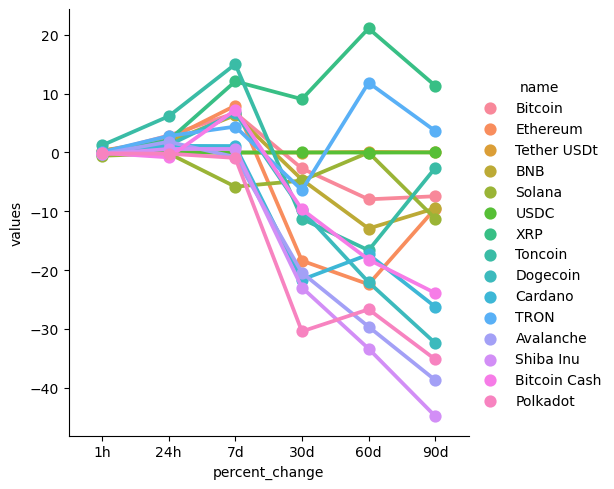

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')


In [33]:
df10 = df3[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60684.802,2024-08-14 04:13:10.845117
150,Bitcoin,61086.298,2024-08-14 07:47:33.243105
180,Bitcoin,61086.298,2024-08-14 07:47:39.704038
210,Bitcoin,61086.298,2024-08-14 07:47:46.307403
240,Bitcoin,61086.298,2024-08-14 07:47:52.770478
270,Bitcoin,61086.298,2024-08-14 07:47:59.172119
300,Bitcoin,61086.298,2024-08-14 07:48:06.496015
330,Bitcoin,61057.062,2024-08-14 07:50:08.400296
360,Bitcoin,61043.482,2024-08-14 07:51:09.994308
390,Bitcoin,61025.650,2024-08-14 07:52:11.665290


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

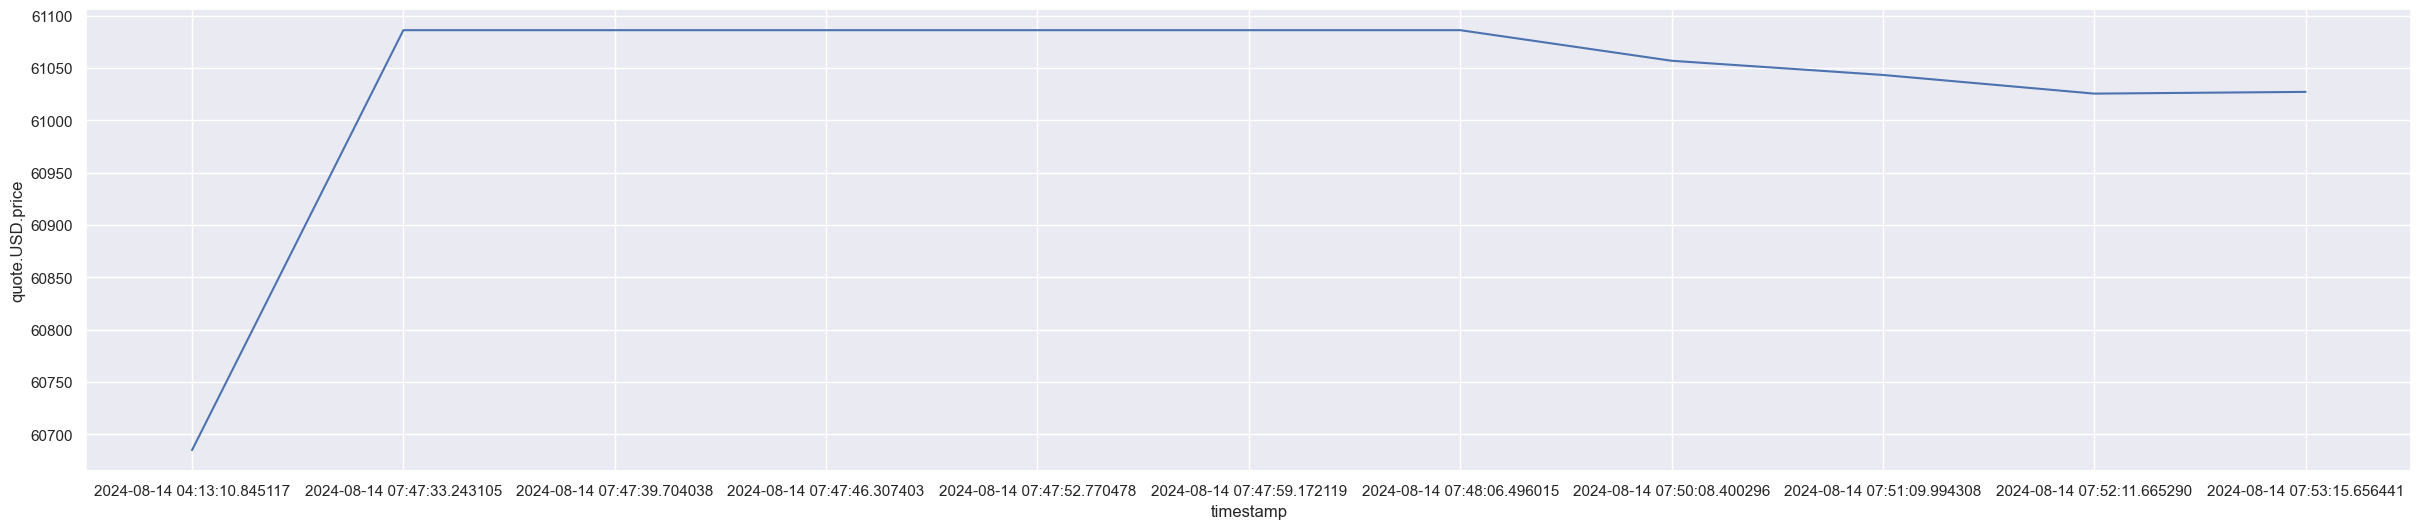

In [42]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(30, 6))
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)